In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import prepare as p

import nltk
import nltk.sentiment

from wordcloud import WordCloud

## Acquire and Prepare

In [2]:
# read json
df = pd.read_json('data.json')

In [3]:
# create dataframe
df = p.create_df(df)

In [4]:
#sanity check
df

,repo,language,original,lemmatized
0,acidanthera/AppleALC,C++,AppleALC\n========\n\n[![Build Status](https:/...,applealc build status http github com acidanth...
1,gongjianhui/AppleDNS,Python,# Final AppleDNS Pro\n\nAppleDNS 通过收集 Apple 在中...,final appledns pro appledns apple cdn itunes i...
2,tomaz/appledoc,Objective-C,About appledoc\n==============\n\n**IMPORTANT ...,about appledoc important notice collaborator n...
3,robovm/apple-ios-samples,Objective-C,# Mirror of Apple's iOS samples\n\nThis reposi...,mirror of apple s io sample this repository mi...
4,appleseedhq/appleseed,C++,# appleseed [![Build Status](https://travis-ci...,appleseed build status http travis ci org appl...
...,...,...,...,...
481,PatMurrayDEV/apple-music-history,JavaScript,[![Netlify Status](https://api.netlify.com/api...,netlify status http api netlify com api v1 bad...
482,antongorodezkiy/codeigniter-apns,PHP,"Codeigniter-apns\n(c) 2012, Anton Gorodezkiy\n...",codeigniter apns c 2012 anton gorodezkiy codei...
484,lprhodes/homebridge-apple-tv,JavaScript,# Homebridge Apple TV\n\n## Introduction\nWelc...,homebridge apple tv introduction welcome to th...
485,lvsti/CoreMediaIO-DAL-Example,C++,# CoreMediaIO-DAL-Example\n\nModernized and ex...,coremediaio dal example modernized and extende...


#### Drop original column

In [5]:
df = df.drop(columns={'original'})

In [6]:
df

,repo,language,lemmatized
0,acidanthera/AppleALC,C++,applealc build status http github com acidanth...
1,gongjianhui/AppleDNS,Python,final appledns pro appledns apple cdn itunes i...
2,tomaz/appledoc,Objective-C,about appledoc important notice collaborator n...
3,robovm/apple-ios-samples,Objective-C,mirror of apple s io sample this repository mi...
4,appleseedhq/appleseed,C++,appleseed build status http travis ci org appl...
...,...,...,...
481,PatMurrayDEV/apple-music-history,JavaScript,netlify status http api netlify com api v1 bad...
482,antongorodezkiy/codeigniter-apns,PHP,codeigniter apns c 2012 anton gorodezkiy codei...
484,lprhodes/homebridge-apple-tv,JavaScript,homebridge apple tv introduction welcome to th...
485,lvsti/CoreMediaIO-DAL-Example,C++,coremediaio dal example modernized and extende...


---

## Explore

#### I'll start by splitting the dataframe by languages

In [7]:
df.language.value_counts()

Swift          76
JavaScript     59
Objective-C    56
Python         45
C              34
Java           30
C++            20
Shell          19
PHP            18
C#             11
Name: language, dtype: int64

In [8]:
# Swift programming language
swift = df[df.language == 'Swift']

# JavaScript programming language
javascript = df[df.language == 'JavaScript']

# Objective-C programming language
objective_c = df[df.language == 'Objective-C']

# Python programming language
python = df[df.language == 'Python']

# C programming language
c = df[df.language == 'C']

# Java programming language
java = df[df.language == 'Java']

# C++ programming language
C_plus_plus = df[df.language == 'C\+\+']

# Shell programming language
shell = df[df.language == 'Shell']

# PHP programming language
php = df[df.language == 'PHP']

# C# programming language
c_sharp = df[df.language == 'C#']

---

## Swift Dataset

In [9]:
swift.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76 entries, 5 to 489
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   repo        76 non-null     object
 1   language    76 non-null     object
 2   lemmatized  76 non-null     object
dtypes: object(3)
memory usage: 2.4+ KB


In [10]:
swift

,repo,language,lemmatized
5,JohnCoates/Aerial,Swift,p align center img src http cloud githubuserco...
14,kiwix/apple,Swift,kiwix for io macos this is the home for kiwix ...
24,WireGuard/wireguard-apple,Swift,wireguard http www wireguard com for io and ma...
25,Sunnyyoung/AppleReserver,Swift,applereserver license mit http img shield io g...
34,microsoft/fluentui-apple,Swift,fluent ui apple fluent ui apple contains nativ...
...,...,...,...
456,genadyo/LivePhotoDemo,Swift,live photo demo this is a quick example of how...
463,efremidze/Shiny,Swift,shiny build status http travis ci org efremidz...
465,tomieq/AppleCrashScripts,Swift,applecrashscripts convertfromjson swift script...
477,DeepLearningKit/DeepLearningKit,Swift,deeplearningkit http deeplearningkit org deep ...


#### Set up for trigrams exploration

In [11]:
swift_words = ' '.join(swift.lemmatized)

In [12]:
swift_trigrams = pd.Series(nltk.ngrams(swift_words.split(), 3))

In [13]:
top_25_swift_trigrams = swift_trigrams.value_counts().head(25).sort_values(ascending=False)

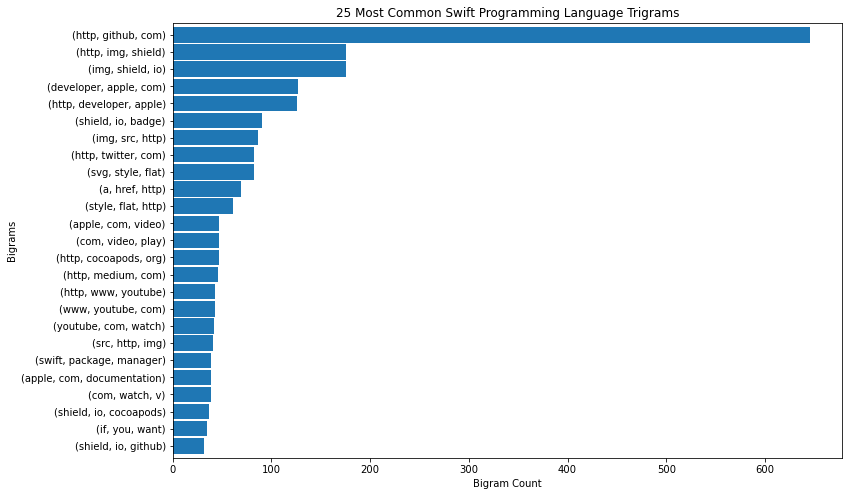

In [14]:
top_25_swift_trigrams.sort_values().plot.barh(width = .9, figsize=(12,8))
plt.xlabel('Trigrams Count')
plt.ylabel('Trigrams')
plt.title('25 Most Common Swift Programming Language Trigrams')
plt.show()

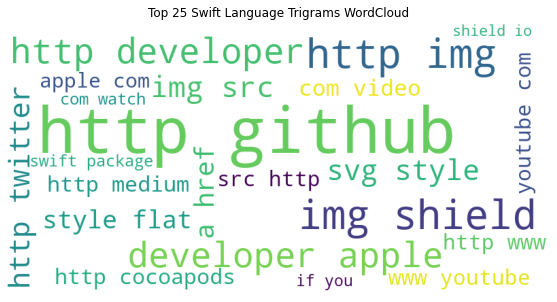

In [16]:
#Generate a wordcloud

#First create a dictionary for the fequencies of the Trigrams
data = {k[0] + ' ' + k[1]: count for k, count in top_25_swift_trigrams.to_dict().items()}

#Create the wordcloud
#Change the figsize before creating the wordcloud
plt.figure(figsize=(10, 5))
image = WordCloud(background_color = 'white', width = 800, height = 400).generate_from_frequencies(data)
plt.title('Top 25 Swift Language Trigrams WordCloud')
plt.imshow(image)
plt.axis('off')
plt.show()

Takeaways:
- HTTP is seen frequently in the top 25 trigrams for Swift programming language. 
- There is also the term `swift package`, `src`, `svc`, etc.
    - Interesting point: The Swift compilers are mostly written in C++. So there is a high chance that the trigrams identified in Swift will be similar to C++

---

### Javascript

In [18]:
javascript.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59 entries, 20 to 484
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   repo        59 non-null     object
 1   language    59 non-null     object
 2   lemmatized  59 non-null     object
dtypes: object(3)
memory usage: 1.8+ KB


In [19]:
javascript

,repo,language,lemmatized
20,linuxmint/cinnamon-spices-applets,JavaScript,cinnamon spice applet validate spice http gith...
21,paradoxxxzero/gnome-shell-system-monitor-applet,JavaScript,gnome shell system monitor extension build sta...
23,tvillarete/apple-music-js,JavaScript,og http user image githubusercontent com 21055...
28,Run2948/wechat_applet,JavaScript,open shop 2 0 1 br http shop 51shop ink demo b...
33,invertase/react-native-apple-authentication,JavaScript,p align center h2 align center react native ap...
42,MiceLiD/ofo-applet,JavaScript,img src http oht7mjuah bkt clouddn com e9 a6 9...
45,bayetech/wechat_mall_applet,JavaScript,http wechat bayekeji com api json api http git...
46,Sioxas/AppleMusic,JavaScript,apple music apple music http github com sioxas...
52,node-apn/node-apn,JavaScript,p align center img src doc logo png alt node a...
59,appium/appium-xcuitest-driver,JavaScript,appium xcuitest driver npm version http img sh...
